In [1]:
# Import the neccessary modules and option settings.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
import json, sys, zipfile, warnings
import matplotlib.colors as mcolors
import matplotlib.cm as cm
warnings.filterwarnings('ignore')
%matplotlib inline
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [2]:
np.arange(1.1,2.0,0.1)

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

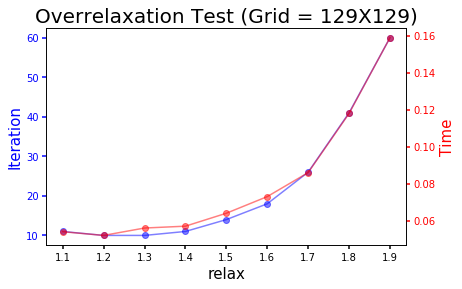

In [3]:
#sb.set_style("dark")

relax=np.arange(1.1,2.0,0.1)
iter_no=[11,10,10,11,14,18,26,41,60]
time_no=[0.054,0.052,0.056,0.057,0.064,0.073,0.086,0.118,0.159]


fig, host = plt.subplots(figsize=(8,4))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()


p1, = host.plot(relax,iter_no, "b-o", label="iteration",alpha=0.5)
p2, = par1.plot(relax,time_no, "r-o", label="time",alpha=0.5)

host.set_xlabel("relax",fontsize=15)
host.set_ylabel("Iteration",fontsize=15)
par1.set_ylabel("Time",fontsize=15)


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2]

#host.legend(lines, [l.get_label() for l in lines],bbox_to_anchor=(2,1.0),fontsize=15)
#host.set_xticklabels(change_year(dm.groupby('decade')['vote_average'].mean()).index)
host.set_title('Overrelaxation Test (Grid = 129X129)',fontsize=20)
plt.show()

In [4]:
Vdf=pd.read_excel('CA_project.xlsx',sheet_name="V_iter")
Vdf_time=pd.read_excel('CA_project.xlsx',sheet_name="V_time")
Vdf

,grid,V_all,V_even_old (thread=1),thread=2,thread=3,thread=4,thread=5,thread=6,thread=7,thread=8,mpi,sor(even/odd),sor(all)
0,9,8,6,6,6,6,6,6,6,6,9.0,91.0,94.0
1,17,9,7,7,7,7,7,7,7,7,10.0,379.0,380.0
2,33,10,7,7,7,7,7,7,7,7,10.0,1491.0,1472.0
3,65,10,7,7,7,7,7,7,7,7,11.0,5794.0,5677.0
4,129,10,7,7,7,7,7,7,7,7,11.0,22420.0,21870.0
5,257,10,7,7,7,7,7,7,7,7,11.0,86334.0,84099.0
6,513,10,7,7,7,7,7,7,7,7,11.0,NaN,NaN
7,1025,10,11,11,10,11,11,11,10,11,NaN,NaN,NaN
8,2049,15,14,14,14,11,16,19,10,14,NaN,NaN,NaN
9,4097,18,21,21,21,21,21,34,21,37,NaN,NaN,NaN


In [5]:
x_name=Vdf.grid.values
x_lab=[str(x)+'x'+str(x) for x in x_name]
x=np.arange(3,13,1)

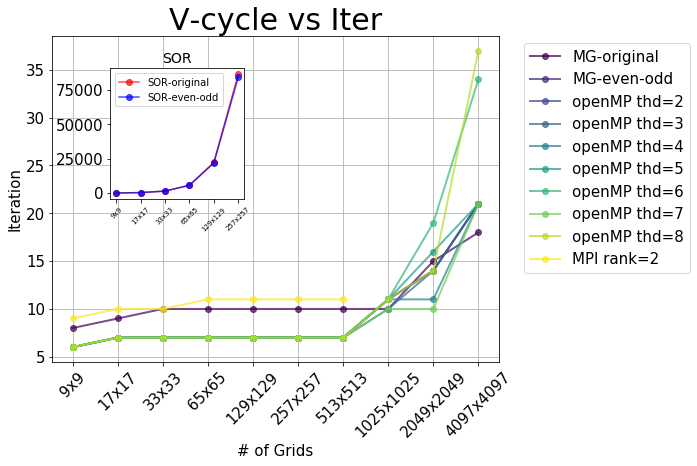

In [6]:

plt.rc('axes', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,6))

num_plots = 10
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, num_plots))))



labels=["MG-original","MG-even-odd","openMP thd=2",
       "openMP thd=3","openMP thd=4","openMP thd=5","openMP thd=6",
       "openMP thd=7","openMP thd=8","MPI rank=2"]

for i in range(len(labels)):
    ax.plot(x,Vdf.iloc[:,i+1],'-o',label=labels[i],linewidth=2,alpha=0.7)


ax.set_title("V-cycle vs Iter",fontsize=30)
ax.set_ylabel('Iteration')
ax.set_xlabel('# of Grids')
ax.set_xticks(x)
ax.set_xticklabels(x_lab,rotation=45);
ax.grid()
ax.legend(fontsize=15,bbox_to_anchor=(1.04, 1));


rect = [0.13,0.5,0.3,0.4]
ax1=ax.inset_axes(rect)
ax1.plot(x[0:6],Vdf.iloc[0:6,11],'ro-',label="SOR-original",alpha=0.7);
ax1.plot(x[0:6],Vdf.iloc[0:6,12],'bo-',label="SOR-even-odd",alpha=0.7);
ax1.set_xticks(x[0:6])
ax1.set_xticklabels(x_lab[0:6],rotation=45,fontsize=7);
ax1.set_title("SOR",fontsize=14);
ax1.legend();


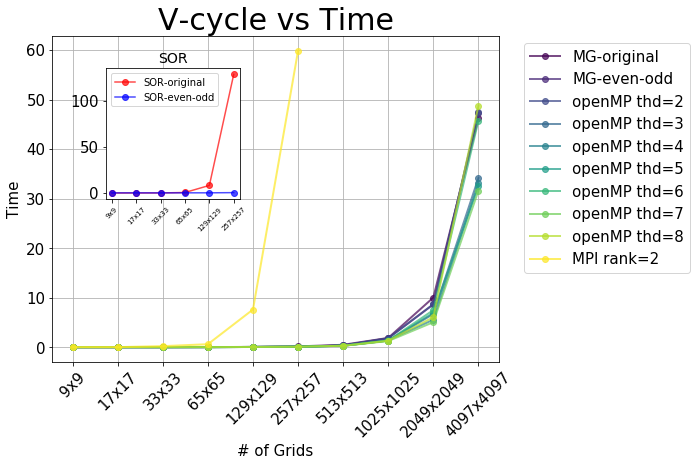

In [7]:
plt.rc('axes', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,6))

num_plots = 10
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.viridis(np.linspace(0, 1, num_plots))))



labels=["MG-original","MG-even-odd","openMP thd=2",
       "openMP thd=3","openMP thd=4","openMP thd=5","openMP thd=6",
       "openMP thd=7","openMP thd=8","MPI rank=2"]

for i in range(len(labels)):
    ax.plot(x,Vdf_time.iloc[:,i+1],'-o',label=labels[i],linewidth=2,alpha=0.7)


ax.set_title("V-cycle vs Time",fontsize=30)
ax.set_ylabel('Time')
ax.set_xlabel('# of Grids')
ax.set_xticks(x)
ax.set_xticklabels(x_lab,rotation=45);
ax.grid()
ax.legend(fontsize=15,bbox_to_anchor=(1.04, 1));


rect = [0.12,0.5,0.3,0.4]
ax1=ax.inset_axes(rect)
ax1.plot(x[0:6],Vdf_time.iloc[0:6,11],'ro-',label="SOR-original",alpha=0.7);
ax1.plot(x[0:6],Vdf_time.iloc[0:6,12],'bo-',label="SOR-even-odd",alpha=0.7);
ax1.set_xticks(x[0:6])
ax1.set_xticklabels(x_lab[0:6],rotation=45,fontsize=7);
ax1.set_title("SOR",fontsize=14);
ax1.legend();


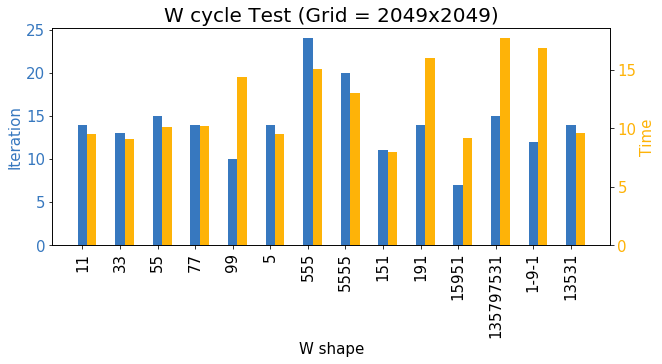

In [8]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sb.palplot(sb.xkcd_palette(colors))
cc=sb.xkcd_palette(colors)

wx=np.arange(0,14,1)*2
w=0.5
iter_no=[14,13,15,14,10,14,24,20,11,14,7,15,12,14]
time_no=[9.531,9.057,10.087,10.224,14.367,9.545,15.056,13.027,7.985,16.031,9.213,17.713,16.848,9.617]
label_np=['11','33','55','77','99','5','555','5555','151','191','15951',
          '135797531','1-9-1','13531']

fig, host = plt.subplots(figsize=(10,4))

par1 = host.twinx()


p1= host.bar(wx,iter_no,width=w,align='center',color=cc[0])
p2= par1.bar(wx+w,time_no,width=w,align='center',color=cc[1])

host.set_xlabel("W shape",fontsize=15)
host.set_ylabel("Iteration",fontsize=15)
par1.set_ylabel("Time",fontsize=15)



host.tick_params(axis='y', labelcolor=cc[0])
par1.tick_params(axis='y', labelcolor=cc[1])

host.set_ylabel("Iteration",color=cc[0])
par1.set_ylabel("Time",color=cc[1]);

host.set_xticks(wx);
host.set_xticklabels(label_np,rotation=90,fontsize=15);

host.set_title('W cycle Test (Grid = 2049x2049)',fontsize=20);


In [9]:
Wdf=pd.read_excel('CA_project.xlsx',sheet_name="W_iter")
Wdf_time=pd.read_excel('CA_project.xlsx',sheet_name="W_time")
Wdf

,grid,V_all,V_even_old (thread=1),V thread=7,V mpi,W_all,W_even_old (thread=1),thread=7,mpi,W_all (FMG),W_even_old (FMG),FMG thread=7,mpi.1
0,9,8,6,6,9.0,3,14,14,9.0,5,4,4,6.0
1,17,9,7,7,10.0,9,16,16,10.0,6,4,4,6.0
2,33,10,7,7,10.0,9,19,19,10.0,6,5,5,6.0
3,65,10,7,7,11.0,9,20,20,11.0,6,5,5,6.0
4,129,10,7,7,11.0,9,20,20,11.0,6,5,5,6.0
5,257,10,7,7,11.0,9,20,20,11.0,6,5,5,6.0
6,513,10,7,7,11.0,9,20,20,11.0,5,5,5,5.0
7,1025,10,11,10,NaN,11,21,21,NaN,5,5,5,NaN
8,2049,15,14,10,NaN,11,28,28,NaN,5,5,6,NaN
9,4097,18,21,21,NaN,48,54,54,NaN,18,9,31,NaN


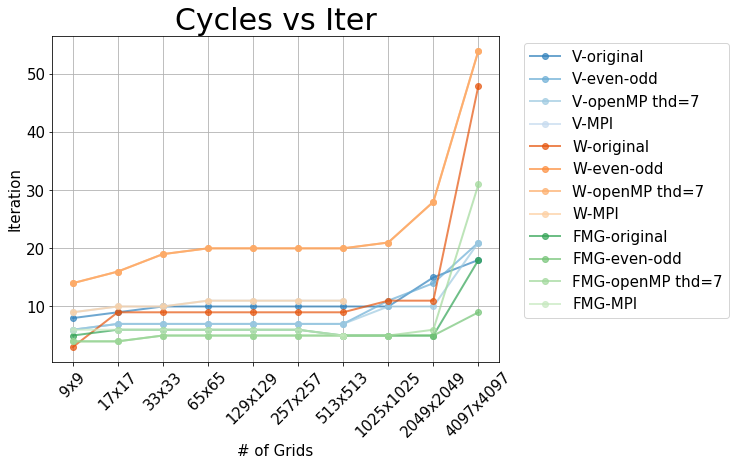

In [10]:
plt.rc('axes', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,6))

num_plots = 20
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20c(np.linspace(0, 1, num_plots))))



labels=["V-original","V-even-odd","V-openMP thd=7","V-MPI",
        "W-original","W-even-odd","W-openMP thd=7","W-MPI",
        "FMG-original","FMG-even-odd","FMG-openMP thd=7","FMG-MPI"]

for i in range(len(labels)):
    ax.plot(x,Wdf.iloc[:,i+1],'-o',label=labels[i],linewidth=2,alpha=0.7)


ax.set_title("Cycles vs Iter",fontsize=30)
ax.set_ylabel('Iteration')
ax.set_xlabel('# of Grids')
ax.set_xticks(x)
ax.set_xticklabels(x_lab,rotation=45);
ax.grid()
ax.legend(fontsize=15,bbox_to_anchor=(1.04, 1));

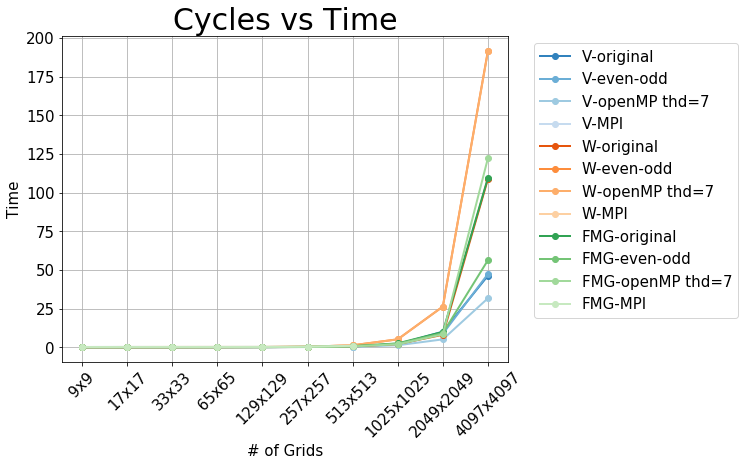

In [11]:
plt.rc('axes', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,6))

num_plots = 20
colormap = plt.cm.gist_ncar
ax.set_prop_cycle(plt.cycler('color', plt.cm.tab20c(np.linspace(0, 1, num_plots))))

labels=["V-original","V-even-odd","V-openMP thd=7","V-MPI",
        "W-original","W-even-odd","W-openMP thd=7","W-MPI",
        "FMG-original","FMG-even-odd","FMG-openMP thd=7","FMG-MPI"]

for i in range(len(labels)):
    ax.plot(x,Wdf_time.iloc[:,i+1],'-o',label=labels[i],linewidth=2)


ax.set_title("Cycles vs Time",fontsize=30)
ax.set_ylabel('Time')
ax.set_xlabel('# of Grids')
ax.set_xticks(x)
ax.set_xticklabels(x_lab,rotation=45);
ax.grid()
ax.legend(fontsize=15,bbox_to_anchor=(1.04, 1));

# rect = [0.12,0.5,0.3,0.4]
# ax1=ax.inset_axes(rect)
# ax1.set_prop_cycle(plt.cycler('color', plt.cm.tab20c(np.linspace(0, 1, num_plots))))
# for i in range(len(labels)):
#     ax1.plot(x[7:],Wdf_time.iloc[7:,i+1],'-o',label=labels[i],linewidth=2)
    

# ax1.set_xticks(x[7:])
# ax1.set_xticklabels(x_lab[7:],rotation=45,fontsize=7);



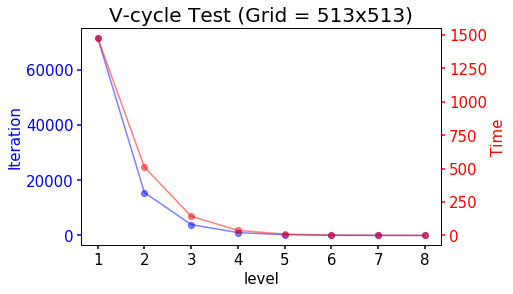

In [12]:
#sb.set_style("dark")

lv=np.arange(1,9,1)
iter_no=[71568,15506,3936,1032,273,72,20,11]
time_no=[1479,511.8,143.9,38.176,10.396,2.922,0.954,0.612]

fig, host = plt.subplots(figsize=(8,4))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()

p1, = host.plot(lv,iter_no, "b-o", label="iteration",alpha=0.5)
p2, = par1.plot(lv,time_no, "r-o", label="time",alpha=0.5)

host.set_xlabel("level",fontsize=15)
host.set_ylabel("Iteration",fontsize=15)
par1.set_ylabel("Time",fontsize=15)


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2]

#host.legend(lines, [l.get_label() for l in lines],bbox_to_anchor=(2,1.0),fontsize=15)
#host.set_xticklabels(change_year(dm.groupby('decade')['vote_average'].mean()).index)
host.set_title('V-cycle Test (Grid = 513x513)',fontsize=20)
plt.show()

In [13]:
# # # Export all the figures'
import junix
junix.export_images(filepath="plot_output.ipynb")